In [1]:
import pandas as pds 
import seaborn as sbn 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [5]:
customer_data = pds.read_csv('Mall_Customers.csv').drop(columns=['CustomerID'])

customer_data.dropna()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
customer_data['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

In [6]:
customer_data['Gender'] = (customer_data['Gender'] == 'Male').astype(int)

/home/kelechi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

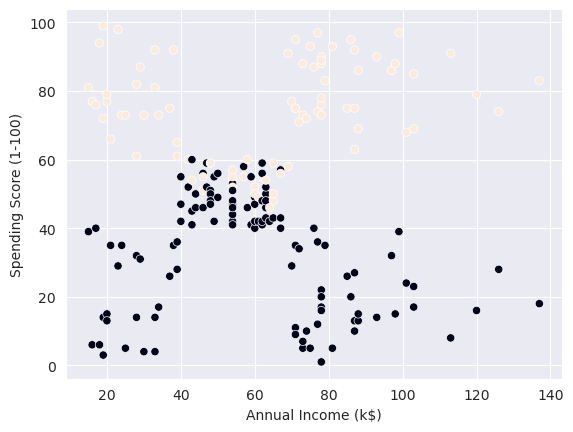

In [10]:
model = KMeans(n_clusters=2, init='random')

model.fit(customer_data)

predictions = model.predict(customer_data)

sbn.set_style('darkgrid') 
sbn.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', c=predictions)

In [11]:
silhouette_score(customer_data, labels=model.labels_, metric='euclidean')

0.29307334005502633